In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [213]:
print([float(x.split('\n')[0]) for x in '''
np = 1
Time mpi: 7.842

np = 2
Time mpi: 4.149

np = 3
Time mpi: 2.749

np = 4
Time mpi: 2.059

np = 5
Time mpi: 1.68

np = 6
Time mpi: 1.418

np = 7
Time mpi: 1.229

np = 8
Time mpi: 1.103

np = 9
Time mpi: 0.984

np = 10
Time mpi: 0.901

np = 11
Time mpi: 0.82

np = 12
Time mpi: 0.772
'''.split('Time mpi: ')[1:]])

[7.842, 4.149, 2.749, 2.059, 1.68, 1.418, 1.229, 1.103, 0.984, 0.901, 0.82, 0.772]


In [214]:
def s_p(p, a=0.5):
    return 1.0 / (a + (1 - a) / p)

In [267]:
alpha = [1, 1, 0.0167, 1, 0.0170, 1, 0.0181, 1, 0.0165, 1, 0.0275]
[s_p(i + 2, a) for i, a in enumerate(alpha)] # - acc[1:]

[1.0,
 1.0,
 3.8091610322826397,
 1.0,
 5.529953917050691,
 1.0,
 7.100381645513446,
 1.0,
 8.707009142359599,
 1.0,
 9.213051823416507]

In [ ]:
3 машины

np = 3
nth = 1
N = 10000

Time mpi + omp: 2.788
np = 2
nth = 1
N = 10000

Time mpi + omp: 4.079
    
1 машина

np = 3
nth = 1
N = 10000

Time mpi + omp: 2.867
np = 2
nth = 1
N = 10000

Time mpi + omp: 4.252

In [269]:
t1 = 7.961
cols = ['name', 'time, sec']
data = [
    ['2 процесса на разных узлах', 4.079],
    ['2 процесса на одном узле', 4.132],
    ['3 процесса на разных узлах', 2.788],
    ['3 процесса на одном узле', 2.867],
#     ['4 потока на одном узле', 2.06, 3.81359],
#     ['8 потоков на двух узлах', 1.283, 6.12315],
#     ['12 потоков на трех узлах', 0.941, 8.34857],
]
df_4 = pd.DataFrame(data, columns=cols).set_index('name')
df_4['acceleration'] = round(t1 / df_4['time, sec'], 3)
# df_4 = df_4[['acceleration']]

In [217]:
cols = ['N \ bs', '32', '1024']
data = [
    ['13.000', 5.49, 5.61],
    ['10.000', 4.38, 3.76],
    ['20.000', 4.73, 4.65],
    ['40.000', 6.49, 6.42]
]
df_5 = pd.DataFrame(data, columns=cols).set_index('N \ bs')

In [218]:
cols = ['', 'GeForce 9XX', 'Tesla T4']
data = [
    ['N=10.000, bs=32', 4.38, 8.29],
    ['N=20.000, bs=32', 4.73, 10.12],
    ['N=40.000, bs=32', 6.49, 11.16],
]
df_5_t4 = pd.DataFrame(data, columns=cols).set_index('')

In [277]:
cols = ['N \ bs', '32', '1024']
data = [
    ['10.000', 4.38, 3.76],
    ['(new) 10.000', 7.87, 21.16],
    ['20.000', 4.73, 4.65],
    ['(new) 20.000', 30.98, 52.91],
    ['40.000', 6.49, 6.42],
    ['(new) 40.000', 121.65, 121.84],
]
df_5_new = pd.DataFrame(data, columns=cols).set_index('N \ bs')

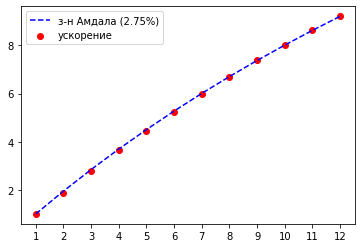

N = 10000 (MPI)
{
    2: 1.877,
    3: 2.773,
    4: 3.647,
    5: 4.465,
    6: 5.227,
    7: 6.004,
    8: 6.707,
    9: 7.385,
    10: 8.025,
    11: 8.625,
    12: 9.214
}


In [268]:
t = np.array([7.842, 4.149, 2.749, 2.059,
              1.68, 1.418, 1.229, 1.103,
              0.984, 0.901, 0.82, 0.772])
t = np.array([7.841, 8.217, 8.217, 8.217,
              8.217, 8.217, 8.217, 8.217,
              8.217,8.217, 8.217, 0.724])
t = np.array([7.961, 4.242, 2.871, 2.183,
              1.783, 1.523, 1.326, 1.187,
              1.078, 0.992, 0.923, 0.864])
acc = t[0] / t
rng = range(1, len(acc) + 1)
a = 0.0275
amd = [s_p(p, a=a) for p in range(1, 12 + 1)]

ax = plt.subplot(1, 1, 1)
ax.plot(rng, amd, '--', color='b', label=f'з-н Амдала ({100*a}%)')
# ax.scatter(rng, amd, color='g')
# ax.plot(rng, acc, color='k')
ax.scatter(rng, acc, color='r', label='ускорение')
plt.xticks(rng)
plt.legend()
plt.show()

print(f"""N = 10000 (MPI)
{json.dumps({i+2: f'{x:.3f}' for i, x in enumerate(acc[1:])}, indent=4).replace('"','')}""")

### Сравнение результатов для различных пар (np, nth)

In [270]:
df_4

,"time, sec",acceleration
name,,
2 процесса на разных узлах,4.079,1.952
2 процесса на одном узле,4.132,1.927
3 процесса на разных узлах,2.788,2.855
3 процесса на одном узле,2.867,2.777


### Сравнение результатов для различных пар (N, bs)

In [221]:
df_5

,32,1024
N \ bs,,
13.000,5.49,5.61
10.000,4.38,3.76
20.000,4.73,4.65
40.000,6.49,6.42


То же самое с нормальным sqrt<br>
И с добавлением sharedMemory

### Сравнение результатов для двух карт

In [222]:
df_5_t4

,GeForce 9XX,Tesla T4
,,
"N=10.000, bs=32",4.38,8.29
"N=20.000, bs=32",4.73,10.12
"N=40.000, bs=32",6.49,11.16


### Сравнение результатов ускорений с использованием __register__, __shared__ памяти и без

In [278]:
df_5_new

,32,1024
N \ bs,,
10.000,4.38,3.76
(new) 10.000,7.87,21.16
20.000,4.73,4.65
(new) 20.000,30.98,52.91
40.000,6.49,6.42
(new) 40.000,121.65,121.84
